# Discuss Different Operations in DataFrame

### Set up the Environment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import clear_output
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
clear_output()

In [3]:
!pip install pyspark
clear_output()

### Import PySpark and the other classes

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType,IntegerType,FloatType,DateType,BooleanType,ArrayType

### Download the Data -- > JSON

In [5]:
!gdown 1ZQYz1_aYxiBZ68Jc1AR_BLv8H1lYUpuc

Downloading...
From: https://drive.google.com/uc?id=1ZQYz1_aYxiBZ68Jc1AR_BLv8H1lYUpuc
To: /content/persons.json
100% 36.1k/36.1k [00:00<00:00, 111MB/s]


In [6]:
file_path = '/content/persons.json'

### Create the Spark Application instance

In [7]:
spark = SparkSession.builder.appName('DataFrameOperations').getOrCreate()

### Create the scheme for the dataframe

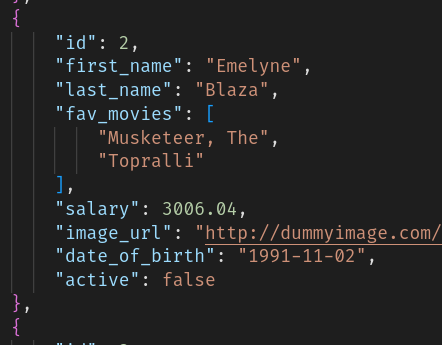

In [8]:
schema = StructType([
    StructField('id',IntegerType(),True),
    StructField('first_name',StringType(),True),
    StructField('last_name',StringType(),True),
    StructField('fav_movies',ArrayType(StringType()),True),
    StructField('salary',FloatType(),True),
    StructField('image_url',StringType(),True),
    StructField('date_of_birth',DateType(),True),
    StructField('active',BooleanType(),True),
])

### Read the json file

In [9]:
person_dataframe = spark.read.json(path=file_path,
                                   schema=schema,
                                   multiLine=True) # since the json data is arragned in multiple lines

In [10]:
person_dataframe.show(10, truncate = False)

+---+----------+---------+-------------------------------------------------------------+-------+-----------------------------------------------+-------------+------+
|id |first_name|last_name|fav_movies                                                   |salary |image_url                                      |date_of_birth|active|
+---+----------+---------+-------------------------------------------------------------+-------+-----------------------------------------------+-------------+------+
|1  |Drucy     |Poppy    |[I giorni contati]                                           |1463.36|http://dummyimage.com/126x166.png/cc0000/ffffff|1991-02-16   |true  |
|2  |Emelyne   |Blaza    |[Musketeer, The, Topralli]                                   |3006.04|http://dummyimage.com/158x106.bmp/cc0000/ffffff|1991-11-02   |false |
|3  |Max       |Rettie   |[The Forgotten Space, Make It Happen]                        |1422.88|http://dummyimage.com/237x140.jpg/ff4444/ffffff|1990-03-03   |false |
|4  

### `Col` Function in Spark DataFrame

In [11]:
from pyspark.sql.functions import col

In [12]:
person_dataframe.select(col('first_name'), col('last_name'), col('salary')).show(5, truncate = False)

+----------+---------+-------+
|first_name|last_name|salary |
+----------+---------+-------+
|Drucy     |Poppy    |1463.36|
|Emelyne   |Blaza    |3006.04|
|Max       |Rettie   |1422.88|
|Ilario    |Kean     |3561.36|
|Toddy     |Drexel   |4934.87|
+----------+---------+-------+
only showing top 5 rows



This results could have been found without `col function` also as below

In [13]:
person_dataframe.select('first_name','last_name','salary').show(5, truncate = False)

+----------+---------+-------+
|first_name|last_name|salary |
+----------+---------+-------+
|Drucy     |Poppy    |1463.36|
|Emelyne   |Blaza    |3006.04|
|Max       |Rettie   |1422.88|
|Ilario    |Kean     |3561.36|
|Toddy     |Drexel   |4934.87|
+----------+---------+-------+
only showing top 5 rows



But `col` function prevail when there is a transormation happens in column like below

In [14]:
person_dataframe.select('first_name','salary',(col('salary')*1.10).alias('increased_salary')).show(10, truncate = False)

+----------+-------+------------------+
|first_name|salary |increased_salary  |
+----------+-------+------------------+
|Drucy     |1463.36|1609.695983886719 |
|Emelyne   |3006.04|3306.6440429687505|
|Max       |1422.88|1565.1680053710938|
|Ilario    |3561.36|3917.496118164063 |
|Toddy     |4934.87|5428.35712890625  |
|Oswald    |1153.23|1268.552978515625 |
|Adrian    |1044.73|1149.202978515625 |
|Dominica  |1147.76|1262.5360107421875|
|Emory     |1082.11|1190.3209838867188|
|Jeremias  |3472.63|3819.8928710937503|
+----------+-------+------------------+
only showing top 10 rows



As you can see the `col` function can be used to do a calcuation out of it and create an new column

### `Expr` function in spark dataframe

In [15]:
from pyspark.sql.functions import expr

In [16]:
person_dataframe.select('first_name','salary',expr('salary * 1.10').alias('increased_salary')).show(10)

+----------+-------+------------------+
|first_name| salary|  increased_salary|
+----------+-------+------------------+
|     Drucy|1463.36| 1609.695983886719|
|   Emelyne|3006.04|3306.6440429687505|
|       Max|1422.88|1565.1680053710938|
|    Ilario|3561.36| 3917.496118164063|
|     Toddy|4934.87|  5428.35712890625|
|    Oswald|1153.23| 1268.552978515625|
|    Adrian|1044.73| 1149.202978515625|
|  Dominica|1147.76|1262.5360107421875|
|     Emory|1082.11|1190.3209838867188|
|  Jeremias|3472.63|3819.8928710937503|
+----------+-------+------------------+
only showing top 10 rows



### `concat_ws` function in pyspark

In [17]:
from pyspark.sql.functions import concat_ws # concar with seperator

In [18]:
person_dataframe.select('first_name','last_name',
                        concat_ws(' ',col('first_name'),col('last_name')).alias('full_name')).show(10)

+----------+---------+----------------+
|first_name|last_name|       full_name|
+----------+---------+----------------+
|     Drucy|    Poppy|     Drucy Poppy|
|   Emelyne|    Blaza|   Emelyne Blaza|
|       Max|   Rettie|      Max Rettie|
|    Ilario|     Kean|     Ilario Kean|
|     Toddy|   Drexel|    Toddy Drexel|
|    Oswald| Petrolli| Oswald Petrolli|
|    Adrian|   Clarey|   Adrian Clarey|
|  Dominica|  Goodnow|Dominica Goodnow|
|     Emory|  Slocomb|   Emory Slocomb|
|  Jeremias|     Bode|   Jeremias Bode|
+----------+---------+----------------+
only showing top 10 rows



### `Filter` and `Where` Methods in PySpark DataFrame

In [19]:
person_dataframe.filter('salary <= 3000').show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|      Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  3|       Max|     Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  6|    Oswald|   Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1986-09-02| false|
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
|  8|  Dominica|    Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...|   1973-08-27| false|
|  9|     Emory|    Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|


In [20]:
person_dataframe.where('salary <= 3000').show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|      Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  3|       Max|     Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  6|    Oswald|   Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1986-09-02| false|
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
|  8|  Dominica|    Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...|   1973-08-27| false|
|  9|     Emory|    Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|


In [21]:
person_dataframe.filter(col('salary') <= 3000).show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|      Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  3|       Max|     Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  6|    Oswald|   Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1986-09-02| false|
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
|  8|  Dominica|    Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...|   1973-08-27| false|
|  9|     Emory|    Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|


In [22]:
person_dataframe.where(col('salary') <= 3000).show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|      Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  3|       Max|     Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  6|    Oswald|   Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1986-09-02| false|
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
|  8|  Dominica|    Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...|   1973-08-27| false|
|  9|     Emory|    Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|


In [23]:
person_dataframe.filter((col('salary') <= 3000) & (col('active') == True)).show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  9|     Emory|  Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 16|   Margaux| Archbold|[And Now a Word f...|1013.75|http://dummyimage...|   1988-07-29|  true|
| 26|     Clive|      Lax|             [Rabid]|2126.87|http://dummyimage...|   1981-10-26|  true|
| 33|  Sherline|  Primett|   [Jungle Fighters]|2309.39|http://dummyimage...|   1972-07-23|  true|
| 34|     Davis|    Pinks|          [Hounddog]|1337.14|http://dummyimage...|   1989-07-27|  true|
| 37|    Carlen|  Sharply|[Dr. Jekyll and M...|2051.85|http://dummyimage...|   2002-06-01|  true|
| 40|    Jordan|   L

### Usage `year` function along with filter conditions

In [24]:
from pyspark.sql.functions import year

In [25]:
person_dataframe.filter((year(col('date_of_birth')) == 1999)
                         & (col('active') == True)).show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| 49| Kendricks|      Kee|   [Flower & Garnet]|2304.39|http://dummyimage...|   1999-11-14|  true|
| 71|    Cecily|  Salomon|[Mrs. Henderson P...|4062.93|http://dummyimage...|   1999-07-18|  true|
| 79|     Deina|  Pennick|[Invisible Invade...|1048.92|http://dummyimage...|   1999-11-28|  true|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+



### Usage of `Array_contains` function in spark

In [26]:
from pyspark.sql.functions import array_contains

In [27]:
person_dataframe.filter(array_contains(col('fav_movies'),'The Forgotten Space')).show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+



### `Distinct` Method in Spark

In [28]:
person_dataframe.count()

100

In [29]:
person_dataframe.distinct().count()

100

In [30]:
person_dataframe.select('active').distinct().count()

2

In [31]:
person_dataframe.select('active').distinct().show()

+------+
|active|
+------+
|  true|
| false|
+------+



In [32]:
person_dataframe.select('first_name','active').distinct().show()

+----------+------+
|first_name|active|
+----------+------+
|   Timothy| false|
|    Camile| false|
|   Emelyne| false|
|   Frankie| false|
|    Jordan|  true|
|     Nyssa|  true|
|      Rodi| false|
|    Darbee| false|
|   Feodora|  true|
|    Oswald| false|
|       Bev|  true|
|   Stanley| false|
|  Sherline|  true|
| Kendricks|  true|
|     Jobie| false|
|     Trace|  true|
|     Alfie|  true|
|    Lucita|  true|
|    Cynthy| false|
|     Ardis|  true|
+----------+------+
only showing top 20 rows



### `orderBy` Method in Spark

In [33]:
person_dataframe.orderBy(year(col('date_of_birth')),'first_name').show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
| 67|   Feodora| Giacomazzo|[Death Watch (La ...| 2122.2|http://dummyimage...|   1971-12-19|  true|
| 41|       Sky|      Hails|[Trotsky, The, Su...|1633.95|http://dummyimage...|   1971-02-19| false|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|
| 82|    Lucita| Sowerbutts|[Redemption: For ...|3052.35|http://dummyimage...|   1972-09-18|  true|
| 97|      Rodi|     Farnan|[Code, The (Menta...|2325.88|http://dummyimage...|   1972-01-04| false|
| 33|  Sherline|    Primett|   [Jungle Fighters]|2309.39|http://dummyimage...|   1972-07-23|  true|


In [34]:
from pyspark.sql.functions import asc,desc

In [35]:
person_dataframe.orderBy(year(col('date_of_birth')).desc(), col('first_name').asc()).show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| 37|    Carlen|    Sharply|[Dr. Jekyll and M...|2051.85|http://dummyimage...|   2002-06-01|  true|
| 92|     Daron|    Briance|[Train on the Bra...|4226.35|http://dummyimage...|   2002-02-22|  true|
| 80|   Lorilee|     Petrie|[Gaudi Afternoon,...|4153.15|http://dummyimage...|   2002-07-29| false|
|100|    Virgie|   Domanski|[Horseman, The, S...|2165.93|http://dummyimage...|   2002-01-05|  true|
| 85|    Maxine|    Ewenson|[Savior, Beaver T...| 3363.5|http://dummyimage...|   2001-01-24| false|
| 69|  Annabell|    Doughty|[Entertaining Ang...|2022.57|http://dummyimage...|   2000-09-03|  true|
| 15|    Feodor|Nancekivell|   [Monsoon Wedding]|2218.46|http://dummyimage...|   2000-10-07| false|


### `Drop Duplicates` Method in Spark

In [36]:
person_dataframe.select((year('date_of_birth').alias('year')),'active').count()

100

In [37]:
person_dataframe.select((year('date_of_birth').alias('year')),'active').show(10)

+----+------+
|year|active|
+----+------+
|1991|  true|
|1991| false|
|1990| false|
|1987|  true|
|1992|  true|
|1986| false|
|1971| false|
|1973| false|
|1974|  true|
|1997|  true|
+----+------+
only showing top 10 rows



In [38]:
person_dataframe.select((year('date_of_birth').alias('year')),'active').dropDuplicates().count()

55

In [39]:
person_dataframe.select((year('date_of_birth').alias('year')),'active').dropDuplicates().show(10)

+----+------+
|year|active|
+----+------+
|1974|  true|
|2002| false|
|1975|  true|
|1986|  true|
|1982| false|
|1976| false|
|1996| false|
|1998|  true|
|1980| false|
|1973|  true|
+----+------+
only showing top 10 rows



### `Row` & `Union` Methods in Spark

In [40]:
from pyspark.sql import Row

In [41]:
row1 = Row(101,'Rahul','P R',['Three Idiots'],45000.0,'www.someimage.com','1992-04-19',True)
row2 = Row(102,'Lathika','Rahul',['Spadikam'],55000.0,'www.someimage.com','1991-06-21',True)

In [42]:
row_list = [row1,row2]
row_list

[<Row(101, 'Rahul', 'P R', ['Three Idiots'], 45000.0, 'www.someimage.com', '1992-04-19', True)>,
 <Row(102, 'Lathika', 'Rahul', ['Spadikam'], 55000.0, 'www.someimage.com', '1991-06-21', True)>]

In [43]:
new_dataframe = spark.createDataFrame(data = row_list, schema = person_dataframe.columns)
new_dataframe.show()

+---+----------+---------+--------------+-------+-----------------+-------------+------+
| id|first_name|last_name|    fav_movies| salary|        image_url|date_of_birth|active|
+---+----------+---------+--------------+-------+-----------------+-------------+------+
|101|     Rahul|      P R|[Three Idiots]|45000.0|www.someimage.com|   1992-04-19|  true|
|102|   Lathika|    Rahul|    [Spadikam]|55000.0|www.someimage.com|   1991-06-21|  true|
+---+----------+---------+--------------+-------+-----------------+-------------+------+



In [44]:
modified_dataframe = person_dataframe.union(new_dataframe)
modified_dataframe.count()

102

In [45]:
modified_dataframe.sort(col('id').desc()).show(10)

+---+----------+---------+--------------------+------------------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies|            salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+------------------+--------------------+-------------+------+
|102|   Lathika|    Rahul|          [Spadikam]|           55000.0|   www.someimage.com|   1991-06-21|  true|
|101|     Rahul|      P R|      [Three Idiots]|           45000.0|   www.someimage.com|   1992-04-19|  true|
|100|    Virgie| Domanski|[Horseman, The, S...| 2165.929931640625|http://dummyimage...|   2002-01-05|  true|
| 99|   Rozalie|   Wannop|[Suddenly, The No...|1259.6400146484375|http://dummyimage...|   1997-03-25| false|
| 98|     Davin|     Labb|[Viva Riva!, Kill...| 1452.739990234375|http://dummyimage...|   1988-01-27|  true|
| 97|      Rodi|   Farnan|[Code, The (Menta...|   2325.8798828125|http://dummyimage...|   1972-01-04| false|
| 96|       Dew| Co

### `withColumn` Method in Spark

In [46]:
from pyspark.sql.functions import round

In [47]:
person_dataframe.withColumn('increased_salary', round(expr('salary * 1.10'),2)).show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+----------------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|increased_salary|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+----------------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|          1609.7|
|  2|   Emelyne|    Blaza|[Musketeer, The, ...|3006.04|http://dummyimage...|   1991-11-02| false|         3306.64|
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|         1565.17|
|  4|    Ilario|     Kean|[Up Close and Per...|3561.36|http://dummyimage...|   1987-06-09|  true|          3917.5|
|  5|     Toddy|   Drexel|[Walk in the Clou...|4934.87|http://dummyimage...|   1992-10-28|  true|         5428.36|
|  6|    Oswald| Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1

### `withColumnRenamed` Method in spark

In [48]:
person_dataframe.withColumnRenamed('date_of_birth','dob').show(10)

+---+----------+---------+--------------------+-------+--------------------+----------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|       dob|active|
+---+----------+---------+--------------------+-------+--------------------+----------+------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|1991-02-16|  true|
|  2|   Emelyne|    Blaza|[Musketeer, The, ...|3006.04|http://dummyimage...|1991-11-02| false|
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|1990-03-03| false|
|  4|    Ilario|     Kean|[Up Close and Per...|3561.36|http://dummyimage...|1987-06-09|  true|
|  5|     Toddy|   Drexel|[Walk in the Clou...|4934.87|http://dummyimage...|1992-10-28|  true|
|  6|    Oswald| Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|1986-09-02| false|
|  7|    Adrian|   Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|1971-08-24| false|
|  8|  Dominica|  Goodnow|    [Hearts Divided]|114

### `drop` Method in Spark

In [49]:
person_dataframe.withColumn('year', year(col('date_of_birth'))).drop('date_of_birth').show(10)

+---+----------+---------+--------------------+-------+--------------------+------+----+
| id|first_name|last_name|          fav_movies| salary|           image_url|active|year|
+---+----------+---------+--------------------+-------+--------------------+------+----+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|  true|1991|
|  2|   Emelyne|    Blaza|[Musketeer, The, ...|3006.04|http://dummyimage...| false|1991|
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...| false|1990|
|  4|    Ilario|     Kean|[Up Close and Per...|3561.36|http://dummyimage...|  true|1987|
|  5|     Toddy|   Drexel|[Walk in the Clou...|4934.87|http://dummyimage...|  true|1992|
|  6|    Oswald| Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...| false|1986|
|  7|    Adrian|   Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...| false|1971|
|  8|  Dominica|  Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...| false|1973|
|  9|     Emory|  Slo

### `describe` method in spark

In [50]:
person_dataframe.describe().show()

+-------+------------------+----------+---------+------------------+--------------------+
|summary|                id|first_name|last_name|            salary|           image_url|
+-------+------------------+----------+---------+------------------+--------------------+
|  count|               100|       100|      100|               100|                 100|
|   mean|              50.5|      null|     null|2881.9606005859373|                null|
| stddev|29.011491975882016|      null|     null|1122.0059393424208|                null|
|    min|                 1|    Adrian| Akenhead|           1013.75|http://dummyimage...|
|    max|               100|      Wynn|   Wotton|           4934.87|http://dummyimage...|
+-------+------------------+----------+---------+------------------+--------------------+



In [51]:
person_dataframe.select('salary').describe().show()

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|               100|
|   mean|2881.9606005859373|
| stddev|1122.0059393424208|
|    min|           1013.75|
|    max|           4934.87|
+-------+------------------+



### Handling Missing Values

In [52]:
bad_movies_list = [Row(None, None, None),
                   Row(None, None, 2020),
                   Row("John Doe", "Awesome Movie", None),
                   Row(None, "Awesome Movie", 2021),
                   Row("Mary Jane", None, 2019),
                   Row("Vikter Duplaix", "Not another teen movie", 2001)]

In [53]:
columns = ['actor_name','movie_title','year']

In [54]:
movies_dataframe = spark.createDataFrame(data = bad_movies_list, schema = columns)

In [55]:
movies_dataframe.show()

+--------------+--------------------+----+
|    actor_name|         movie_title|year|
+--------------+--------------------+----+
|          null|                null|null|
|          null|                null|2020|
|      John Doe|       Awesome Movie|null|
|          null|       Awesome Movie|2021|
|     Mary Jane|                null|2019|
|Vikter Duplaix|Not another teen ...|2001|
+--------------+--------------------+----+



In [56]:
print('total row count : ',movies_dataframe.count(),'\n')
print('number of rows having non-null values\n')
movies_dataframe.describe().filter("summary = 'count'").show()

total row count :  6 

number of rows having non-null values

+-------+----------+-----------+----+
|summary|actor_name|movie_title|year|
+-------+----------+-----------+----+
|  count|         3|          3|   4|
+-------+----------+-----------+----+



In [57]:
movies_dataframe.na.drop().show()

+--------------+--------------------+----+
|    actor_name|         movie_title|year|
+--------------+--------------------+----+
|Vikter Duplaix|Not another teen ...|2001|
+--------------+--------------------+----+



In [58]:
movies_dataframe.na.drop('any').show()

+--------------+--------------------+----+
|    actor_name|         movie_title|year|
+--------------+--------------------+----+
|Vikter Duplaix|Not another teen ...|2001|
+--------------+--------------------+----+



In [59]:
movies_dataframe.na.drop('all').show()

+--------------+--------------------+----+
|    actor_name|         movie_title|year|
+--------------+--------------------+----+
|          null|                null|2020|
|      John Doe|       Awesome Movie|null|
|          null|       Awesome Movie|2021|
|     Mary Jane|                null|2019|
|Vikter Duplaix|Not another teen ...|2001|
+--------------+--------------------+----+



In [60]:
movies_dataframe.where(~(col('actor_name').isNull())).show()

+--------------+--------------------+----+
|    actor_name|         movie_title|year|
+--------------+--------------------+----+
|      John Doe|       Awesome Movie|null|
|     Mary Jane|                null|2019|
|Vikter Duplaix|Not another teen ...|2001|
+--------------+--------------------+----+



In [61]:
movies_dataframe.where((col('actor_name').isNull())).show()

+----------+-------------+----+
|actor_name|  movie_title|year|
+----------+-------------+----+
|      null|         null|null|
|      null|         null|2020|
|      null|Awesome Movie|2021|
+----------+-------------+----+



### `User Defined Functions` in pyspark --> `udf`

**`Normal python` function `will NOT work in spark dataframes`, python functions need `to be converted into spark functions` using the `udf` class**

In [62]:
from pyspark.sql.functions import udf

In [63]:
students_list = [('Rahul',92),
                 ('Lathika',81),
                 ('Suku',55)]
students_columns = ['name','score']

In [64]:
students_dataframe = spark.createDataFrame(data = students_list, schema = students_columns)

students_dataframe.show()

+-------+-----+
|   name|score|
+-------+-----+
|  Rahul|   92|
|Lathika|   81|
|   Suku|   55|
+-------+-----+



In [65]:
def grade_python_func(score:int):
  if score >=90:
    grade = 'A'
  elif score >=80:
    grade = 'B'
  else:
    grade = 'C'
  return grade

In [66]:
grade_python_func(55)

'C'

In [67]:
# converting the python user defined function into a spark function using udf function

grade_spark_func = udf(grade_python_func)

In [68]:
students_dataframe.select('name','score',(grade_spark_func(col('score')).alias('grade'))).show()

+-------+-----+-----+
|   name|score|grade|
+-------+-----+-----+
|  Rahul|   92|    A|
|Lathika|   81|    B|
|   Suku|   55|    C|
+-------+-----+-----+



# Aggregations

Downloading the csv file dataset

In [69]:
!gdown 18A7GmP-RWLs5X6SZrBZ_1WBP1nb7jlxc

Downloading...
From: https://drive.google.com/uc?id=18A7GmP-RWLs5X6SZrBZ_1WBP1nb7jlxc
To: /content/flight-summary.csv
100% 527k/527k [00:00<00:00, 189MB/s]


In [70]:
csv_path = '/content/flight-summary.csv'

In [71]:
flight_dataframe = spark.read.csv(path = csv_path, header= True, inferSchema = True)
flight_dataframe.show(10,False)

+-----------+------------------------------------------------+------------+------------+---------+--------------------------------------------+----------------+----------+-----+
|origin_code|origin_airport                                  |origin_city |origin_state|dest_code|dest_airport                                |dest_city       |dest_state|count|
+-----------+------------------------------------------------+------------+------------+---------+--------------------------------------------+----------------+----------+-----+
|BQN        |Rafael Hernández Airport                        |Aguadilla   |PR          |MCO      |Orlando International Airport               |Orlando         |FL        |441  |
|PHL        |Philadelphia International Airport              |Philadelphia|PA          |MCO      |Orlando International Airport               |Orlando         |FL        |4869 |
|MCI        |Kansas City International Airport               |Kansas City |MO          |IAH      |George Bush 

In [73]:
# lets reaname the last column

flight_dataframe = flight_dataframe.withColumnRenamed('count','flight_count')
flight_dataframe.show(10,False)

+-----------+------------------------------------------------+------------+------------+---------+--------------------------------------------+----------------+----------+------------+
|origin_code|origin_airport                                  |origin_city |origin_state|dest_code|dest_airport                                |dest_city       |dest_state|flight_count|
+-----------+------------------------------------------------+------------+------------+---------+--------------------------------------------+----------------+----------+------------+
|BQN        |Rafael Hernández Airport                        |Aguadilla   |PR          |MCO      |Orlando International Airport               |Orlando         |FL        |441         |
|PHL        |Philadelphia International Airport              |Philadelphia|PA          |MCO      |Orlando International Airport               |Orlando         |FL        |4869        |
|MCI        |Kansas City International Airport               |Kansas City |

In [74]:
flight_dataframe.printSchema()

root
 |-- origin_code: string (nullable = true)
 |-- origin_airport: string (nullable = true)
 |-- origin_city: string (nullable = true)
 |-- origin_state: string (nullable = true)
 |-- dest_code: string (nullable = true)
 |-- dest_airport: string (nullable = true)
 |-- dest_city: string (nullable = true)
 |-- dest_state: string (nullable = true)
 |-- flight_count: integer (nullable = true)



Lets check the null values in each columns

In [75]:
null_count = {x:flight_dataframe.where(col(x).isNull()).count() for x in flight_dataframe.columns}
null_count

{'origin_code': 0,
 'origin_airport': 0,
 'origin_city': 0,
 'origin_state': 0,
 'dest_code': 0,
 'dest_airport': 0,
 'dest_city': 0,
 'dest_state': 0,
 'flight_count': 0}

### `count` & `countDistinct` functions

In [76]:
from pyspark.sql.functions import count, countDistinct

In [83]:
flight_dataframe.select(count('origin_airport'),count('dest_airport')).show()

+---------------------+-------------------+
|count(origin_airport)|count(dest_airport)|
+---------------------+-------------------+
|                 4693|               4693|
+---------------------+-------------------+



`count` function does not count the null values

In [82]:
flight_dataframe.select(countDistinct('origin_airport'),countDistinct('dest_airport')).show()

+------------------------------+----------------------------+
|count(DISTINCT origin_airport)|count(DISTINCT dest_airport)|
+------------------------------+----------------------------+
|                           322|                         322|
+------------------------------+----------------------------+



In [86]:
flight_dataframe.select(count('origin_airport').alias('total no origin airports'),
                        countDistinct('origin_airport').alias('unique no origin airports')).show()

+------------------------+-------------------------+
|total no origin airports|unique no origin airports|
+------------------------+-------------------------+
|                    4693|                      322|
+------------------------+-------------------------+



### `min`-`max`-`sum`-`sumDistinct`-`avg` functions

In [87]:
from pyspark.sql.functions import min, max,sum, sumDistinct,avg

In [88]:
flight_dataframe.select(min('flight_count')).show()

+-----------------+
|min(flight_count)|
+-----------------+
|                1|
+-----------------+



In [89]:
flight_dataframe.select(max('flight_count')).show()

+-----------------+
|max(flight_count)|
+-----------------+
|            13744|
+-----------------+



In [90]:
flight_dataframe.select(sum('flight_count')).show()

+-----------------+
|sum(flight_count)|
+-----------------+
|          5332914|
+-----------------+



In [91]:
flight_dataframe.select(sumDistinct('flight_count')).show()

+--------------------------+
|sum(DISTINCT flight_count)|
+--------------------------+
|                   3612257|
+--------------------------+



In [92]:
flight_dataframe.select(avg('flight_count')).show()

+------------------+
| avg(flight_count)|
+------------------+
|1136.3549968037503|
+------------------+



### Aggregation by Grouping - Use `groupBy` & `orderBy`

In [93]:
flight_dataframe.show(5)

+-----------+--------------------+------------+------------+---------+--------------------+---------+----------+------------+
|origin_code|      origin_airport| origin_city|origin_state|dest_code|        dest_airport|dest_city|dest_state|flight_count|
+-----------+--------------------+------------+------------+---------+--------------------+---------+----------+------------+
|        BQN|Rafael Hernández ...|   Aguadilla|          PR|      MCO|Orlando Internati...|  Orlando|        FL|         441|
|        PHL|Philadelphia Inte...|Philadelphia|          PA|      MCO|Orlando Internati...|  Orlando|        FL|        4869|
|        MCI|Kansas City Inter...| Kansas City|          MO|      IAH|George Bush Inter...|  Houston|        TX|        1698|
|        SPI|Abraham Lincoln C...| Springfield|          IL|      ORD|Chicago O'Hare In...|  Chicago|        IL|         998|
|        SNA|John Wayne Airpor...|   Santa Ana|          CA|      PHX|Phoenix Sky Harbo...|  Phoenix|        AZ|      

In [107]:
flight_dataframe.groupBy('origin_city').count().show()

+----------------+-----+
|     origin_city|count|
+----------------+-----+
|           Tyler|    2|
|       Fairbanks|    4|
|       Worcester|    2|
|     Springfield|    8|
|           Pasco|    5|
|      Charleston|   30|
|      Harrisburg|    6|
|         Phoenix|   79|
|       Brunswick|    1|
|          Monroe|    3|
|   Crescent City|    1|
|        Savannah|   11|
|     Devils Lake|    2|
|           Omaha|   21|
|   Windsor Locks|   25|
|       Anchorage|   30|
|       Texarkana|    1|
|       Allentown|    3|
|Marthas Vineyard|    2|
|       Aguadilla|    4|
+----------------+-----+
only showing top 20 rows



In [113]:
from pyspark.sql.functions import asc, desc

In [115]:
flight_dataframe.groupBy('origin_city').count().orderBy(desc('count'), asc('origin_city')).show()

+-----------------+-----+
|      origin_city|count|
+-----------------+-----+
|          Chicago|  231|
|          Houston|  170|
|          Atlanta|  169|
|Dallas-Fort Worth|  148|
|           Denver|  139|
|         New York|  133|
|      Minneapolis|  120|
|          Detroit|  112|
|   Salt Lake City|   89|
|           Newark|   88|
|      Los Angeles|   80|
|    San Francisco|   80|
|          Phoenix|   79|
|        Las Vegas|   78|
|          Orlando|   74|
|          Seattle|   73|
|        Chantilly|   71|
|        Charlotte|   69|
|        Baltimore|   67|
|           Boston|   62|
+-----------------+-----+
only showing top 20 rows



In [124]:
flight_dataframe.groupBy('origin_state','dest_state').avg('flight_count').show()

+------------+----------+-----------------+
|origin_state|dest_state|avg(flight_count)|
+------------+----------+-----------------+
|          MN|        IL|          1497.25|
|          IL|        ND|           1216.5|
|          NC|        OR|            254.0|
|          ID|        NV|            655.0|
|          SC|        PA|           100.75|
|          CO|        ID|            989.0|
|          KS|        MN|            633.0|
|          NE|        AZ|           1249.0|
|          IA|        CO|            985.0|
|          IL|        NV|           1902.0|
|          RI|        GA|            947.0|
|          NE|        GA|            938.5|
|          IN|        MA|            299.0|
|          OK|        TX|           1353.5|
|          CT|        FL|            781.0|
|          MN|        SD|           1094.0|
|          OH|        CT|            130.0|
|          VA|        ME|             43.0|
|          MO|        MO|           1200.5|
|          FL|        TN|593.818

In [129]:
flight_dataframe.groupBy('origin_state','dest_state')\
                .agg(round(avg(col('flight_count')),1).alias('avg_flights'))\
                .orderBy(desc('avg_flights')).show()

+------------+----------+-----------+
|origin_state|dest_state|avg_flights|
+------------+----------+-----------+
|          GA|        MD|     5838.0|
|          MD|        GA|     5837.0|
|          MA|        MD|     4431.0|
|          MD|        MA|     4412.0|
|          NV|        GA|     4113.0|
|          GA|        NV|     4099.0|
|          HI|        HI|     4020.0|
|          IL|        MA|     3971.5|
|          MA|        IL|     3971.0|
|          CO|        NV|     3821.0|
|          NV|        CO|     3814.5|
|          GA|        FL|     3620.9|
|          FL|        GA|     3619.9|
|          MI|        MA|     3424.0|
|          MA|        MI|     3423.0|
|          CA|        NV|     3280.6|
|          NV|        CA|     3278.2|
|          PA|        MA|     3237.5|
|          MA|        PA|     3235.5|
|          NV|        NV|     3217.0|
+------------+----------+-----------+
only showing top 20 rows



In [131]:
flight_dataframe.groupBy('origin_state','dest_state')\
                .agg(round(avg(col('flight_count')),1).alias('avg_flights'),
                     sum(col('flight_count')).alias('total_flights'))\
                .orderBy(desc('avg_flights')).show()

+------------+----------+-----------+-------------+
|origin_state|dest_state|avg_flights|total_flights|
+------------+----------+-----------+-------------+
|          GA|        MD|     5838.0|         5838|
|          MD|        GA|     5837.0|         5837|
|          MA|        MD|     4431.0|         4431|
|          MD|        MA|     4412.0|         4412|
|          NV|        GA|     4113.0|         4113|
|          GA|        NV|     4099.0|         4099|
|          HI|        HI|     4020.0|        56280|
|          IL|        MA|     3971.5|         7943|
|          MA|        IL|     3971.0|         7942|
|          CO|        NV|     3821.0|         7642|
|          NV|        CO|     3814.5|         7629|
|          GA|        FL|     3620.9|        57934|
|          FL|        GA|     3619.9|        57919|
|          MI|        MA|     3424.0|         3424|
|          MA|        MI|     3423.0|         3423|
|          CA|        NV|     3280.6|        42648|
|          N

In [145]:
flight_dataframe.groupBy('origin_state','dest_state')\
                .agg(round(avg(col('flight_count')),1).alias('avg_flights'),
                     sum(col('flight_count')).alias('total_flights'))\
                .where(col('dest_state') == 'CA')\
                .orderBy(desc('avg_flights'))\
                .show()

+------------+----------+-----------+-------------+
|origin_state|dest_state|avg_flights|total_flights|
+------------+----------+-----------+-------------+
|          NV|        CA|     3278.2|        42617|
|          NJ|        CA|     2837.8|        11351|
|          NY|        CA|     2667.0|        24003|
|          CA|        CA|     2373.4|       208859|
|          AZ|        CA|     2339.7|        44455|
|          WA|        CA|     2331.6|        37305|
|          UT|        CA|     1908.4|        22901|
|          IL|        CA|     1754.4|        28071|
|          VA|        CA|     1711.2|        10267|
|          GA|        CA|     1589.0|        12712|
|          CO|        CA|     1375.2|        31629|
|          MA|        CA|     1363.1|         9542|
|          TX|        CA|     1357.4|        57011|
|          MI|        CA|     1339.7|         4019|
|          OR|        CA|     1267.0|        24073|
|          MN|        CA|     1240.0|         8680|
|          F

In [147]:
flight_dataframe.groupBy('origin_state','dest_state')\
                .agg(round(avg(col('flight_count')),1).alias('avg_flights'),
                     sum(col('flight_count')).alias('total_flights'))\
                .where(col('dest_state') == 'CA')\
                .where(col('total_flights') > 50000)\
                .orderBy(desc('avg_flights'))\
                .show()

+------------+----------+-----------+-------------+
|origin_state|dest_state|avg_flights|total_flights|
+------------+----------+-----------+-------------+
|          CA|        CA|     2373.4|       208859|
|          TX|        CA|     1357.4|        57011|
+------------+----------+-----------+-------------+



In [134]:
flight_dataframe.groupBy('origin_state')\
                .agg(min(col('flight_count')).alias('min_flight_any_destination'),
                     max(col('flight_count')).alias('max_flight_any_destination'))\
                .orderBy(asc('origin_state')).show()

+------------+--------------------------+--------------------------+
|origin_state|min_flight_any_destination|max_flight_any_destination|
+------------+--------------------------+--------------------------+
|          AK|                         7|                      6383|
|          AL|                         4|                      3212|
|          AR|                         1|                      2598|
|          AS|                       107|                       107|
|          AZ|                         1|                      7380|
|          CA|                         1|                     13744|
|          CO|                         1|                      7211|
|          CT|                         3|                      2341|
|          DE|                        34|                        66|
|          FL|                         1|                      8202|
|          GA|                         1|                      8234|
|          GU|                    